In [1]:
import numpy as np
import pandas as pd

In [129]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [130]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [131]:
data=df.query('Attrition == "Yes"')

In [5]:
df.shape

(1470, 35)

In [6]:
#Data types of each attribute
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Exploration

In [7]:
#Count of Attrition
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [9]:
#Remove unrelated columns

#Remove the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [10]:
df.groupby('Attrition').mean().T.sort_values(by=['Yes'])

Attrition,No,Yes
StockOptionLevel,0.845093,0.527426
JobLevel,2.145985,1.637131
YearsSinceLastPromotion,2.234388,1.945148
EnvironmentSatisfaction,2.771290,2.464135
JobSatisfaction,2.778589,2.468354
JobInvolvement,2.770479,2.518987
RelationshipSatisfaction,2.733982,2.599156
TrainingTimesLastYear,2.832928,2.624473
WorkLifeBalance,2.781022,2.658228
Education,2.927007,2.839662


# Main Visualisations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def Heat_map(data, features):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45) 
    plt.title('Heatmap of Correlation Matrix')

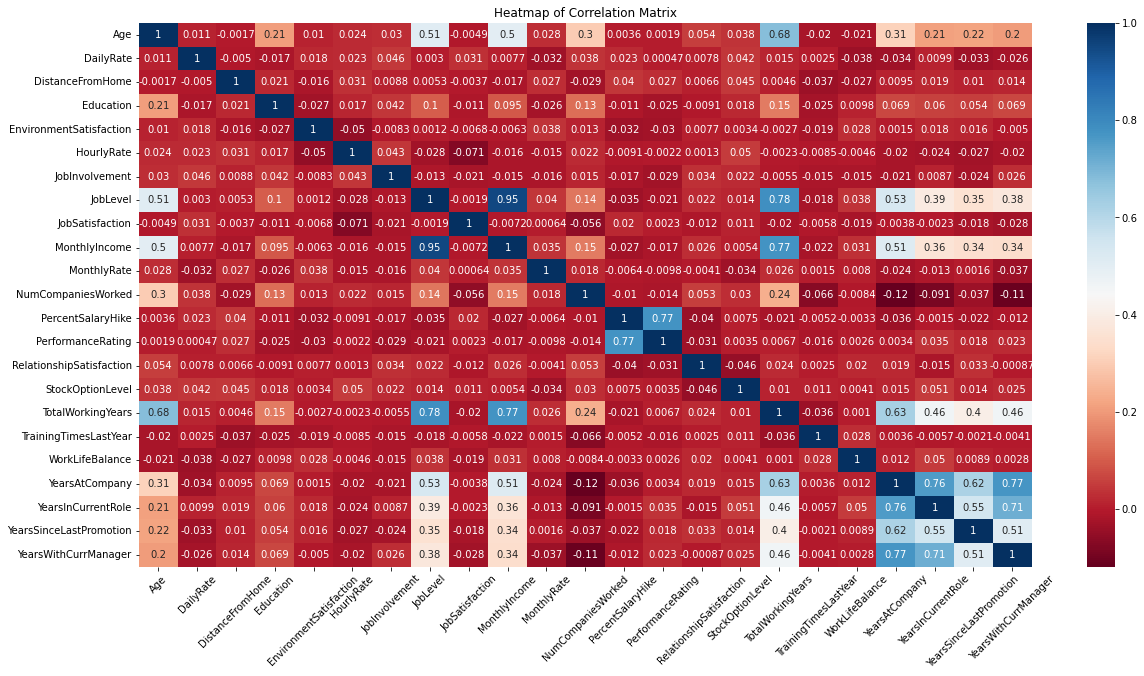

In [13]:
Heat_map(df,list(df.columns))

95% correlation between "JobLevel" & "MonthlyIncome"

###### Lets drop "JobLevel"

In [14]:
#Remove column Joblevel
df = df.drop('JobLevel', axis = 1) #sharing 95% correlation with 'MonthlyIncome' column

## Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

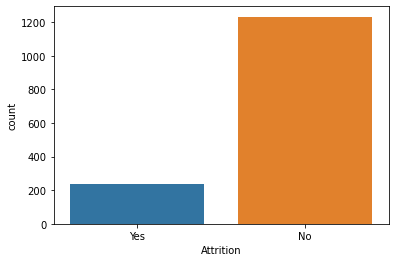

In [15]:
#Visualisation of the Count of Attrition
sns.countplot(df['Attrition'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

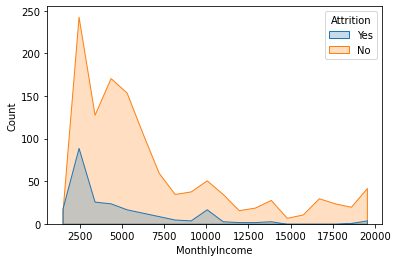

In [16]:
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="poly")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

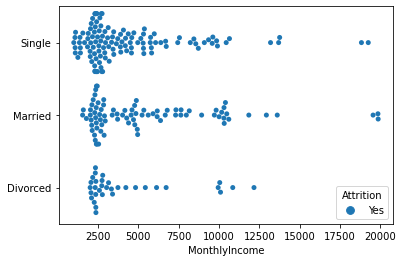

In [136]:
ax = sns.swarmplot(data=data, x="MonthlyIncome",y="MaritalStatus", hue="Attrition")
ax.set(ylabel="")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

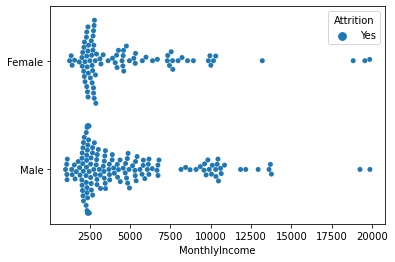

In [17]:
ax = sns.swarmplot(data=data, x="MonthlyIncome",y="Gender", hue="Attrition")
ax.set(ylabel="")

<AxesSubplot:xlabel='Department', ylabel='count'>

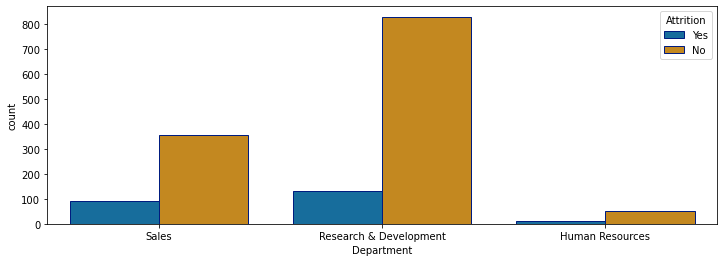

In [18]:
#Department vs attrition
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Department', hue='Attrition', data = df, palette="colorblind", 
              ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

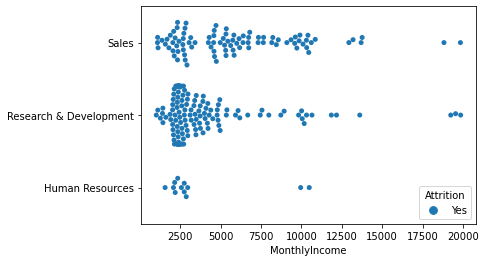

In [19]:
ax = sns.swarmplot(data=data, x="MonthlyIncome",y="Department", hue="Attrition")
ax.set(ylabel="")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

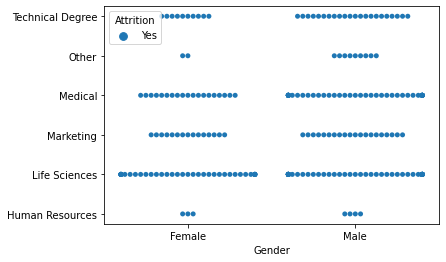

In [20]:
ax = sns.swarmplot(data=data, x="Gender",y="EducationField", hue="Attrition")
ax.set(ylabel="")

<AxesSubplot:xlabel='Age', ylabel='Count'>

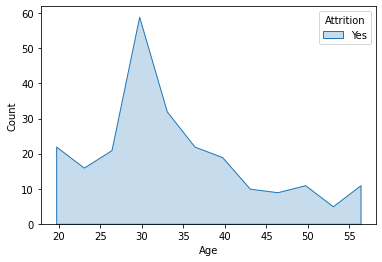

In [21]:
sns.histplot(data, x="Age", hue="Attrition", element="poly")

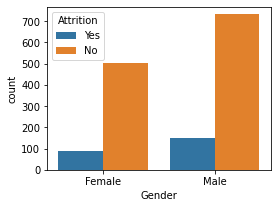

In [22]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x='Gender', data=df, hue="Attrition")

[Text(0, 0.5, '')]

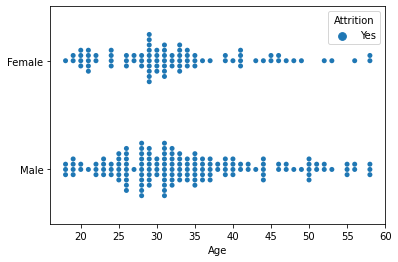

In [23]:
ax = sns.swarmplot(data=data, x="Age",y="Gender", hue="Attrition")
ax.set(ylabel="")

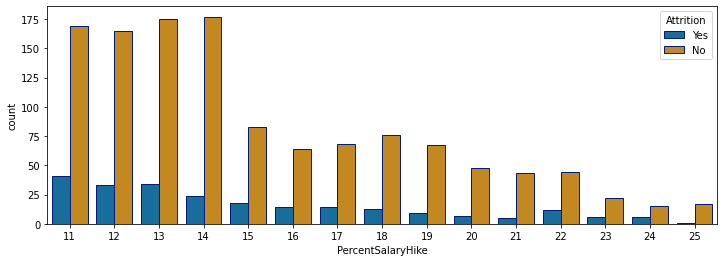

In [24]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='PercentSalaryHike', hue='Attrition', data = df, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

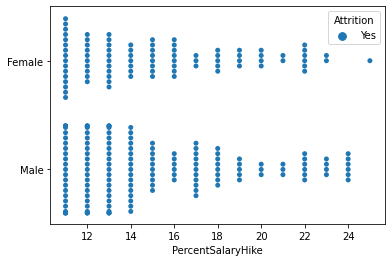

In [25]:
ax = sns.swarmplot(data=data, x="PercentSalaryHike",y="Gender", hue="Attrition")
ax.set(ylabel="")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

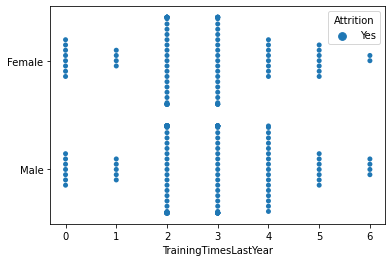

In [26]:
ax = sns.swarmplot(data=data, x="TrainingTimesLastYear",y="Gender", hue="Attrition")
ax.set(ylabel="")

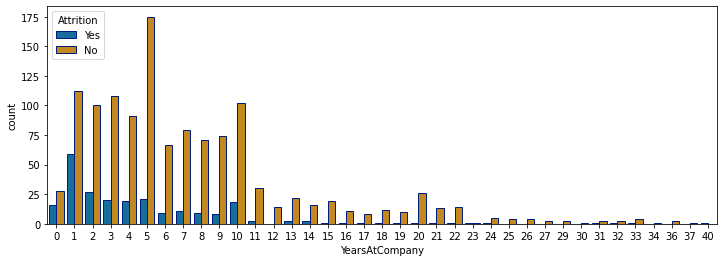

In [27]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='YearsAtCompany', hue='Attrition', data = df, palette="colorblind", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

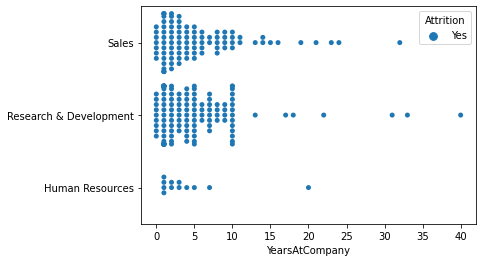

In [28]:
ax = sns.swarmplot(data=data, x="YearsAtCompany",y="Department", hue="Attrition")
ax.set(ylabel="")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

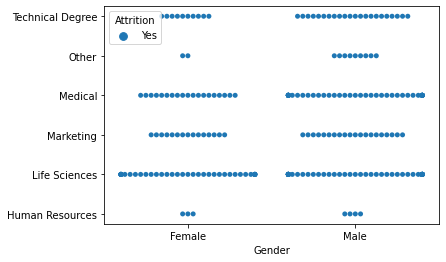

In [29]:
ax = sns.swarmplot(data=data, x="Gender",y="EducationField", hue="Attrition")
ax.set(ylabel="")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

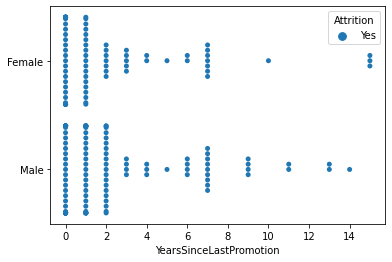

In [30]:
ax = sns.swarmplot(data=data, x="YearsSinceLastPromotion",y="Gender", hue="Attrition")
ax.set(ylabel="")

# Data Cleaning

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#Transform non-numeric columns into numerical columns

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\mrjav\AppData\Local\Temp/ipykernel_17560/393242200.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


# Data Split

In [34]:
#Create a new column at the end of the dataframe that contains the same value 
df['Age_Years'] = df['Age']
#Remove the first column called age 
df = df.drop('Age', axis = 1)
#Show the dataframe
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [35]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:df.shape[1]].values 
Y = df.iloc[:, 0].values 

In [36]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split

In [37]:
# Split the dataset into 75% Training set and 25% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Data Imbalance Check

In [39]:
Attrition_rate=df.Attrition.value_counts(1)
Attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

- Attrition is 16%

Text(0.5, 1.0, 'Distribution of Attrition per Employees')

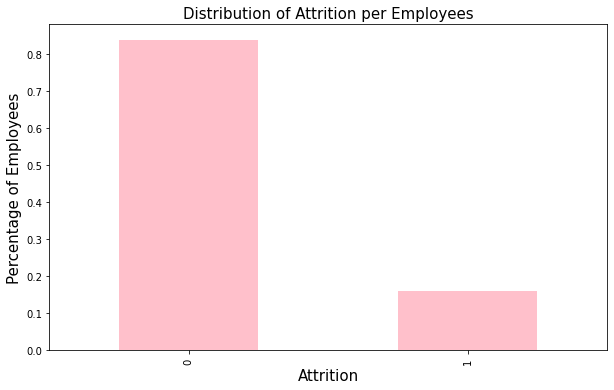

In [40]:
(df['Attrition'].value_counts()/len(df)).plot(kind='bar', figsize=(10, 6), stacked=False, color = 'pink')
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Percentage of Employees', fontsize=15)
plt.title('Distribution of Attrition per Employees', fontsize=15)

The distribution of attrition show imbalance in the sample

* To get a good result with machine learning, the samples can be undersampled or oversampled
* Here SMOTE (Synthetic Minority Over-Sampling Technique) is used

# Upsample using SMOTE

In [41]:
from imblearn.over_sampling import SMOTE 

In [42]:
sm = SMOTE(random_state=12)

In [43]:
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)

In [44]:
print(X_train_sm.shape)
print(X_train.shape)

(1846, 29)
(1102, 29)


In [45]:
# Create the Original and oversampled (SMOTE)  training sets
data_dict = {"Original": (X_train, Y_train),
                "SMOTE": (X_train_sm, Y_train_sm)}

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [47]:
# Loop through each of training sets and apply 10-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in data_dict.keys():
    lr_scores = cross_val_score(LogisticRegression(), data_dict[method][0], data_dict[method][1], cv=10, scoring='f1')
    print("\nThe best F1 Score for {} data is:".format(method))
    print (lr_scores.mean())


The best F1 Score for Original data is:
0.39249600640904986

The best F1 Score for SMOTE data is:
0.7921261774572452


# Modelling

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [49]:
DT_Classifier = DecisionTreeClassifier()

In [50]:
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
max_depth = np.arange(1, 6)
max_features = np.arange(1, 20)

In [51]:
param_grid = {'max_depth':max_depth, 'criterion':['gini', 'entropy'], 
              'max_features' : max_features,  'min_samples_split':min_samples_split}

In [52]:
DT_grid = GridSearchCV(DT_Classifier, param_grid=param_grid, cv=10, scoring='f1')

In [53]:
DT_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='f1')

In [54]:
DT_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 9,
 'min_samples_split': 0.1}

In [55]:
DT_cv_result = DT_grid.cv_results_['mean_test_score']

#### With upsampling

In [56]:
DT_grid.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='f1')

In [57]:
DT_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 19,
 'min_samples_split': 0.1}

In [58]:
DT_cv_result_sm = DT_grid.cv_results_['mean_test_score']

# RCF

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RF_Classifier = RandomForestClassifier()

In [61]:
n_estimators = [10, 32, 64, 100, 120]
max_features = np.arange(1, 8)
max_depth = np.arange(1, 12)

In [62]:
param_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'bootstrap':['True']}

In [63]:
RF_grid = GridSearchCV(RF_Classifier, param_grid=param_grid, cv=10, scoring='f1')

In [64]:
RF_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True'],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': [10, 32, 64, 100, 120]},
             scoring='f1')

In [65]:
RF_grid.best_params_

{'bootstrap': 'True', 'max_features': 6, 'n_estimators': 64}

In [66]:
RF_cv_result = RF_grid.cv_results_['mean_test_score']

###### Oversampling

In [67]:
RF_grid.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True'],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7]),
                         'n_estimators': [10, 32, 64, 100, 120]},
             scoring='f1')

In [68]:
RF_grid.best_params_

{'bootstrap': 'True', 'max_features': 6, 'n_estimators': 120}

In [69]:
RF_cv_result_sm = RF_grid.cv_results_['mean_test_score']

### Return the feature importances (the higher, the more important the feature)

In [70]:
importances = RF_grid.best_estimator_.feature_importances_

In [71]:
print(importances)

[0.01809899 0.02972675 0.01851941 0.03198171 0.02911942 0.029536
 0.04036596 0.00803797 0.02936159 0.026448   0.02789647 0.04069409
 0.06211325 0.05179305 0.02777715 0.02996623 0.0559956  0.02614657
 0.00292537 0.03864007 0.0563834  0.05294615 0.03314509 0.03498818
 0.0444044  0.0348436  0.02875719 0.03458773 0.05480062]


In [72]:
dictionary = dict(zip(df.columns[1:], importances))

In [73]:
dictionary = dict(sorted(dictionary.items(), key=lambda item: item[1]))

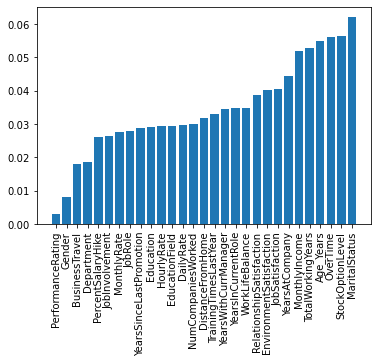

In [74]:
data = dictionary
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.xticks(range(len(data)), names, rotation=90)
plt.show()

In [75]:
import operator
sorted_d = dict( sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))

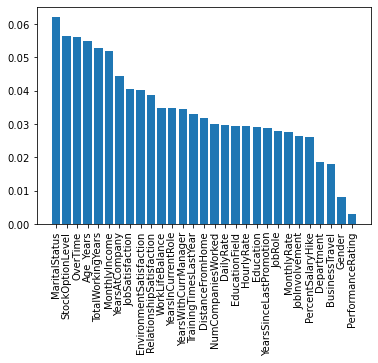

In [76]:
data = sorted_d
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.xticks(range(len(data)), names, rotation=90)
plt.show()

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_classifier = KNeighborsClassifier()

In [79]:
k_values = list(range(1,20))
param_grid = {'n_neighbors' : k_values}
knn_grid = GridSearchCV(knn_classifier, param_grid, cv=10, scoring='f1')

In [80]:
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [81]:
knn_grid.best_params_

{'n_neighbors': 1}

In [82]:
knn_cv_result = knn_grid.cv_results_['mean_test_score']

##### oversampling

In [83]:
knn_grid.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='f1')

In [84]:
knn_grid.best_params_

{'n_neighbors': 2}

In [85]:
knn_cv_result_sm = knn_grid.cv_results_['mean_test_score']

# Use Logistic Regression algorithm

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
LogReg_clf = LogisticRegression(solver='saga', max_iter=2000)

In [88]:
C = np.logspace(0, 4, 10)

In [89]:
penalty = ['l1', 'l2']
#l1_ratio = []

In [90]:
log_grid = GridSearchCV(LogReg_clf,param_grid={'C':C,'penalty':penalty} ,cv=10, scoring='f1')

In [91]:
log_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [92]:
log_grid.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [93]:
log_cv_result = log_grid.cv_results_['mean_test_score']

##### oversample

In [94]:
log_grid.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='f1')

In [95]:
log_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [96]:
log_cv_result_sm = log_grid.cv_results_['mean_test_score']

## Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
NB_Classifier = GaussianNB()

In [99]:
param_grid = {'var_smoothing': np.logspace(0,-20, num=100)}

In [100]:
NB_grid = GridSearchCV(NB_Classifier, param_grid=param_grid, cv=10, scoring='f1')

In [101]:
NB_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.28029144e-01, 3.94420606e-01, 2.47707636e-01,
       1.55567614e-01, 9.77009957e-02, 6.13590727e-02, 3.85352859e-02,
       2.42012826e-02, 1.51991108e-02, 9.54548457e-03, 5.99484250e-03,
       3.76493581e-03, 2.36448941e-03, 1.48496826e-03, 9.32603347e-04,
       5.85702082e-04, 3.67837977e-04, 2.3...
       4.43062146e-16, 2.78255940e-16, 1.74752840e-16, 1.09749877e-16,
       6.89261210e-17, 4.32876128e-17, 2.71858824e-17, 1.70735265e-17,
       1.07226722e-17, 6.73415066e-18, 4.22924287e-18, 2.65608778e-18,
       1.66810054e-18, 1.04761575e-18, 6.57933225e-19, 4.13201240e-19,
       2.59502421e-19, 1.62975083e-19, 1.02353102e-19, 6.42807312e-20,
       4.03701726e-20, 2.53536449e-20, 1.59228279e-20, 1.00000000e-20])},
             scoring='f1')

In [102]:
NB_grid.best_params_

{'var_smoothing': 0.005994842503189409}

In [103]:
NB_cv_result = NB_grid.cv_results_['mean_test_score']

##### oversample

In [104]:
NB_grid.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.28029144e-01, 3.94420606e-01, 2.47707636e-01,
       1.55567614e-01, 9.77009957e-02, 6.13590727e-02, 3.85352859e-02,
       2.42012826e-02, 1.51991108e-02, 9.54548457e-03, 5.99484250e-03,
       3.76493581e-03, 2.36448941e-03, 1.48496826e-03, 9.32603347e-04,
       5.85702082e-04, 3.67837977e-04, 2.3...
       4.43062146e-16, 2.78255940e-16, 1.74752840e-16, 1.09749877e-16,
       6.89261210e-17, 4.32876128e-17, 2.71858824e-17, 1.70735265e-17,
       1.07226722e-17, 6.73415066e-18, 4.22924287e-18, 2.65608778e-18,
       1.66810054e-18, 1.04761575e-18, 6.57933225e-19, 4.13201240e-19,
       2.59502421e-19, 1.62975083e-19, 1.02353102e-19, 6.42807312e-20,
       4.03701726e-20, 2.53536449e-20, 1.59228279e-20, 1.00000000e-20])},
             scoring='f1')

In [105]:
NB_grid.best_params_

{'var_smoothing': 0.09770099572992251}

In [106]:
NB_cv_result_sm = NB_grid.cv_results_['mean_test_score']

# Plotting the model vs accuracy on training data

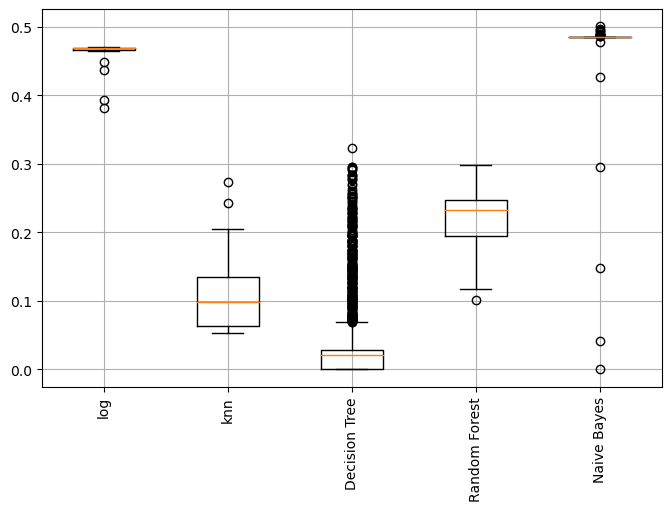

In [107]:
# Plotting the model vs accuracy on training data

models_accuracy = []

models_accuracy.append(('log', log_cv_result.mean(), log_cv_result.std()))
models_accuracy.append(('knn', knn_cv_result.mean(), knn_cv_result.std()))
models_accuracy.append(('Decision Tree',  DT_cv_result.mean(), DT_cv_result.std()))
models_accuracy.append(('Random Forest', RF_cv_result.mean(), RF_cv_result.std()))
models_accuracy.append(('Naive Bayes', NB_cv_result.mean(), NB_cv_result.std()))

models_accuracy

results = []
results.append(log_cv_result)
results.append(knn_cv_result)
results.append(DT_cv_result)
results.append(RF_cv_result)
results.append(NB_cv_result)

plt.subplots(figsize=(8, 5), dpi=100)
plt.boxplot(results, labels=[ 'log', 'knn', 
'Decision Tree', 'Random Forest', 'Naive Bayes'])
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

## With Oversampling

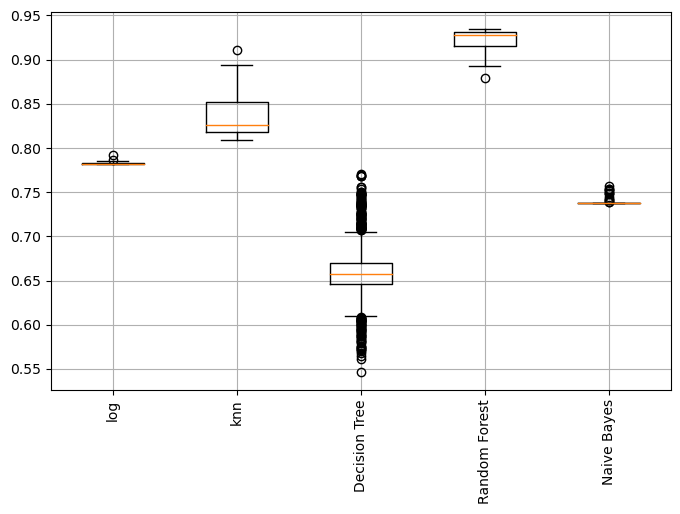

In [108]:
# Plotting the model vs accuracy on training data

models_accuracy = []

models_accuracy.append(('log', log_cv_result_sm.mean(), log_cv_result_sm.std()))
models_accuracy.append(('knn', knn_cv_result_sm.mean(), knn_cv_result_sm.std()))
models_accuracy.append(('Decision Tree',  DT_cv_result_sm.mean(), DT_cv_result_sm.std()))
models_accuracy.append(('Random Forest', RF_cv_result_sm.mean(), RF_cv_result_sm.std()))
models_accuracy.append(('Naive Bayes', NB_cv_result_sm.mean(), NB_cv_result_sm.std()))

models_accuracy

results = []
results.append(log_cv_result_sm)
results.append(knn_cv_result_sm)
results.append(DT_cv_result_sm)
results.append(RF_cv_result_sm)
results.append(NB_cv_result_sm)

plt.subplots(figsize=(8, 5), dpi=100)
plt.boxplot(results, labels=[ 'log', 'knn', 
'Decision Tree', 'Random Forest', 'Naive Bayes'])
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

Selecting Random Forest Algorithm because it also performs relatively better in the presenece of noise

In [109]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [110]:
Y_RF_pred = RF_grid.predict(X_test)

In [111]:
accuracy_score(Y_test, Y_RF_pred)

0.8668478260869565

In [112]:
print(classification_report(Y_test, Y_RF_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       310
           1       0.70      0.28      0.40        58

    accuracy                           0.87       368
   macro avg       0.79      0.63      0.66       368
weighted avg       0.85      0.87      0.84       368



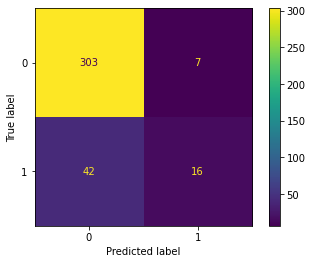

In [113]:
plot_confusion_matrix(RF_grid,X_test, Y_test)

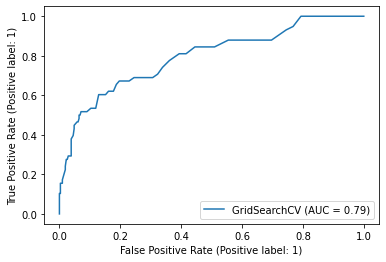

In [114]:
plot_roc_curve(RF_grid, X_test, Y_test)

In [115]:
Y_log_pred = log_grid.predict(X_test)

In [116]:
accuracy_score(Y_test, Y_log_pred)

0.7771739130434783

In [117]:
print(classification_report(Y_test, Y_log_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       310
           1       0.39      0.76      0.52        58

    accuracy                           0.78       368
   macro avg       0.67      0.77      0.69       368
weighted avg       0.86      0.78      0.80       368



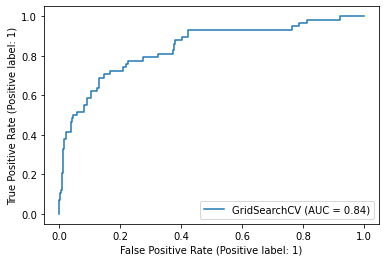

In [118]:
plot_roc_curve(log_grid, X_test, Y_test)

In [119]:
Y_DT_pred = DT_grid.predict(X_test)

In [120]:
accuracy_score(Y_test, Y_DT_pred)

0.720108695652174

In [121]:
print(classification_report(Y_test, Y_DT_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       310
           1       0.29      0.55      0.38        58

    accuracy                           0.72       368
   macro avg       0.60      0.65      0.60       368
weighted avg       0.80      0.72      0.75       368



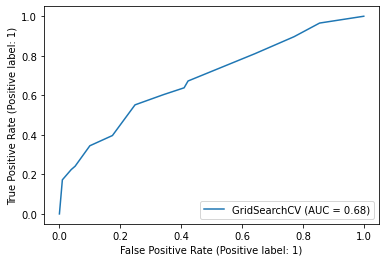

In [122]:
plot_roc_curve(DT_grid, X_test, Y_test)

E.O.R